|CSE519| Homework Assignment 2|
|-|:-|
|**Name**| **Caitao Zhan**|
|**ID #**| **111634527**|
|**Email**| **caitaozhan@stonybrook.edu**|


# 0 Project Description

In a nutshell, this data science project is about predicting USA housing price.

It is a featured prediction competition from [Kaggle](https://www.kaggle.com/c/zillow-prize-1). Click the link to see more information.

In [1]:
# import all packages needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

from from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

---

# 1 Task One: Do Pairwise Pearson

## 1.1 Data

Data source: [Kaggle](https://www.kaggle.com/c/zillow-prize-1/data)

In [2]:
house_df = pd.read_csv('../data/properties_2016_backup.csv')

D:\Program Files\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
house_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [4]:
pd.set_option('display.max_columns', 60)
house_df.describe(include='all')

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
count,2.985217e+06,811519.000000,6061.000000,1628.000000,2.973755e+06,2.973767e+06,12629.000000,1.938488e+06,2.856305e+06,17096.0,202717.000000,2.929652e+06,2.709184e+06,7672.000000,190798.000000,202717.000000,22001.000000,2.973780e+06,312637.000000,2.856305e+06,883267.000000,883267.000000,69014,1.806401e+06,2.973780e+06,2.973780e+06,2.709118e+06,517534.0,27960.000000,36939.0,32075.0,485459.0,2972940,2.973780e+06,1978629,2.973780e+06,2.922372e+06,2.973780e+06,1.156402e+06,2.971237e+06,2.973742e+06,1624.0,311631.000000,6747.000000,1.977490e+06,80355.000000,2647.000000,2.925289e+06,682069.000000,5163,2.930235e+06,2.942667e+06,2.973778e+06,2.917484e+06,2.953967e+06,56462,56464.000000,2.910091e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240,NaN,5638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0100,NaN,LAR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1153896,NaN,275029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5163,NaN,NaN,NaN,NaN,NaN,56462,NaN,NaN
mean,1.332586e+07,1.931166,7.202607,646.883292,2.209143e+00,3.088949e+00,3.725948,5.784787e+00,2.299263e+00,66.0,1380.630396,1.827162e+03,1.760001e+03,1178.900678,2739.187235,1388.944578,2414.339439,6.048032e+03,1.168710,2.244165e+00,1.823517,383.769357,NaN,4.012053e+00,3.400147e+07,-1.182019e+08,2.282281e+04,1.0,519.710980,1.0,1.0,1.0,NaN,2.600484e+02,NaN,6.048345e+07,3.499335e+04,2.570461e+03,1.934764e+05,9.655267e+04,1.475018e+00,7.0,1.010009,5.999555,1.181171e+00,319.803397,278.296562,1.964262e+03,1.401464,NaN,1.708836e+05,4.204790e+05,2.014999e+03,2.524780e+05,5.377607e+03,NaN,13.892409,6.048431e+13
std,7.909966e+06,3.148587,2.436290,538.793473,1.077754e+00,1.275859e+00,0.501700,1.805352e+00,1.000736e+00,0.0,632.868543,1.819780e+03,9.710610e+02,357.073036,5447.428327,664.488709,7695.302952,2.023278e+01,0.461273,9.912054e-01,0.610035,245.443419,NaN,3.293733e+00,2.433812e+05,3.453171e+05,3.375924e+05,0.0,191.323284,0.0,0.0,0.0,NaN,1.590817e+01,NaN,2.008117e+05,5.072747e+04,7.880711e+02,1.657133e+05,3.673175e+03,2.840403e+00,0.0,0.117709,0.384050,2.447896e+00,233.086314,369.731508,2.344132e+01,0.539076,NaN,4.020683e+05,7.263467e+05,3.683161e-02,4.450132e+05,9.183107e+03,NaN,2.581006,3.249035e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,3.000000,1.000000e+00,1.000000e+00,120.000000,112.000000,3.000000,117.000000,6.037000e+03,1.000000,1.000000e+00,0.000000,0.000000,NaN,1.000000e+00,3.332439e+07,-1.194758e+08,1.000000e+02,1.0,19.000000,1.0,1.0,1.0,NaN,3.100000e+01,NaN,6.037101e+07,3.491000e+03,1.286000e+03,6.952000e+03,

## 1.2 Visualization

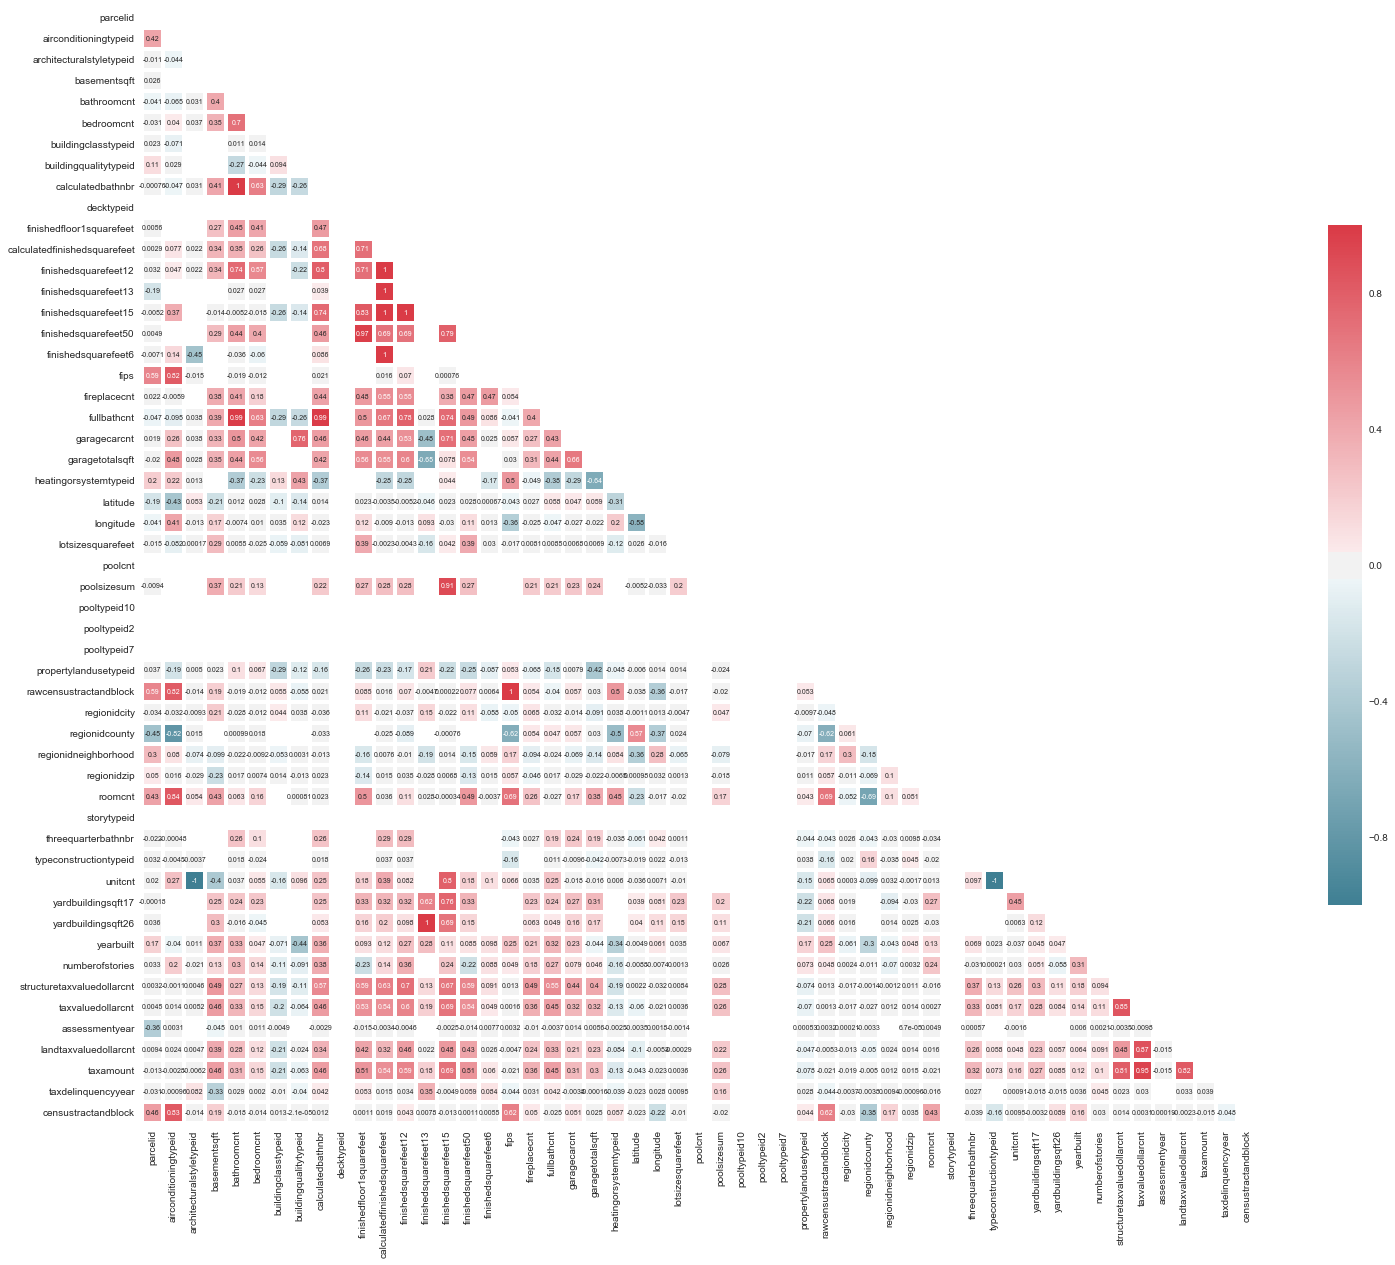

In [5]:
sns.set(style="white")

corr = house_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, annot_kws={"size":7}, linewidth=3, cbar_kws={"shrink": .5})

f.savefig('../figures/correlations.pdf')
plt.show()

## 1.3 Analysis

$Correlation = \frac{\sum_{i=1}^{n}(X_i- \bar{X})(Y_i- \bar{Y})}{\sqrt{\sum_{i=1}^{n}(X_i- \bar{X})^2}\sqrt{\sum_{i=1}^{n}(Y_i- \bar{Y})^2}} = \frac{Cov(X,Y)}{\sigma (X) \sigma (Y)}$ 

If variables $X$ and $Y$ are correlated, then the value of $X$ has some predictive power on the value of $Y$.

Before showing the most positive and negative correlations, I will first point out that why some features have no correlation values with all other features. These no correlation features include **decktypeid**, **poolcnt**, **pooltypeid10**, **pooltypeid2**, **pooltypeid7**, and **storetypeid**. They have no correlations with all other features because each of them either has a same scalar value or NaN. Taking decktypeid as an example, in 2,985,217 rows, there are 17096 rows with the same scalar value $7$, and the other 2,968,121 rows's scalar value is $NaN$. When DataFrame.corr() calculates correlations, it simpley ignores all the $NaN$, so feature decktypeid's every scalar value is $7$, and that explains the reason. For these six features, I think it is reasonable to **ignore** them in further studies.

In [6]:
corr2 = corr.unstack()
corr2 = corr2.sort_values()

pd.set_option('display.max_rows', None)
print(corr2[corr2 > 0.9])
print(corr2[corr2 < -0.6])

finishedsquarefeet15          poolsizesum                     0.907567
poolsizesum                   finishedsquarefeet15            0.907567
taxvaluedollarcnt             taxamount                       0.949731
taxamount                     taxvaluedollarcnt               0.949731
finishedfloor1squarefeet      finishedsquarefeet50            0.974551
finishedsquarefeet50          finishedfloor1squarefeet        0.974551
fullbathcnt                   calculatedbathnbr               0.987360
                              bathroomcnt                     0.987360
calculatedbathnbr             fullbathcnt                     0.987360
bathroomcnt                   fullbathcnt                     0.987360
rawcensustractandblock        fips                            0.999940
fips                          rawcensustractandblock          0.999940
finishedsquarefeet15          calculatedfinishedsquarefeet    0.999994
calculatedfinishedsquarefeet  finishedsquarefeet15            0.999994
taxdel

| $X$ | $Y$ | $Correlation$ > $0.9$ |
|:- | :- |:- |
|finishedsquarefeet15       |   poolsizesum  |                   0.907567|
|taxamount              |      taxvaluedollarcnt    |           0.949731|
|finishedsquarefeet50       |   finishedfloor1squarefeet   |     0.974551  |
|fullbathcnt             |      calculatedbathnbr     |          0.987360 |
|bathroomcnt             |      fullbathcnt         |            0.987360 |
|fips                  |        rawcensustractandblock  |        0.999940|
|calculatedfinishedsquarefeet | finishedsquarefeet15       |     0.999994|
|finishedsquarefeet15      |    finishedsquarefeet12     |       1.000000|
|finishedsquarefeet13      |    yardbuildingsqft26      |        1.000000|
|calculatedfinishedsquarefeet | finishedsquarefeet6        |     1.000000|
|calculatedfinishedsquarefeet  |finishedsquarefeet13        |    1.000000|
|calculatedfinishedsquarefeet | finishedsquarefeet12        |    1.000000|
|calculatedbathnbr        | bathroomcnt             |     1.000000|
|yardbuildingsqft26       |  finishedsquarefeet13      |      1.000000|

| $X$ | $Y$ | $Correlation$ < $-0.6$ |
|:- | :- |:- |
|unitcnt         |          typeconstructiontypeid   |  -1.000000  |
|unitcnt         |          architecturalstyletypeid |  -1.000000   |
|regionidcounty     |       airconditioningtypeid  |    -0.818740  |
|regionidcounty      |      roomcnt            |        -0.690660 |
|finishedsquarefeet13  |    garagetotalsqft         |   -0.654211  |
|heatingorsystemtypeid  |   garagetotalsqft         |   -0.643676  |
|regionidcounty       |     fips              |         -0.619126 |
|regionidcounty       |     rawcensustractandblock  |   -0.615078 |

Above are two tables reflecting the most positive and most negative correlations respectively. The most positives table lists all pairs of variables with correlation **larger than 0.9**, and the most negative table lists all pairs of variables with correlation **less than -0.6**.

Note that seven pairs of features have a "perfect" correlation of value 1.0. I looked back to the original data and found out that these pairs are actually "**almost duplicated**" data! If two columns have the same value, then their correlation must be 1.0, just like a column correlating with itself. For example, feature **bathroomcnt** and **calculatedbathnbr** have the same value whenever they both exist a value on each row. In fact, these two features have the same meanings according to *zillow_data_dictionary.xlsx*, thus I think it is reasonable to remove one the two during furthur studies.

---

# 2 Task Two: Plot Five Figures

## 2.1 Line Chart

The relationship between **year** and **building quality** is interesting. Let's see whether houses are better a hundred years ago or now?

In [11]:
X = 'yearbuilt'
Y = 'buildingqualitytypeid'

df = house_df.loc[:,[X, Y]]

df.dropna(how='any', inplace=True)
df = df[df.yearbuilt>1900]
df = df.groupby(X).mean()
df.plot()

In [14]:
df.shape

(2973755, 2)

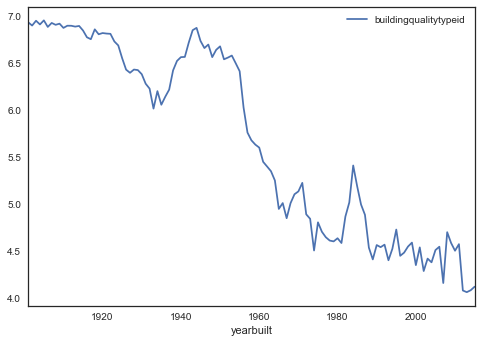

In [12]:
plt.show()

Fig-: This line chart shows that the **building quality** of houses goes **down** as years pass by. Old houses are better built than new houses! Houses get worse and worse, poor Americans ;)

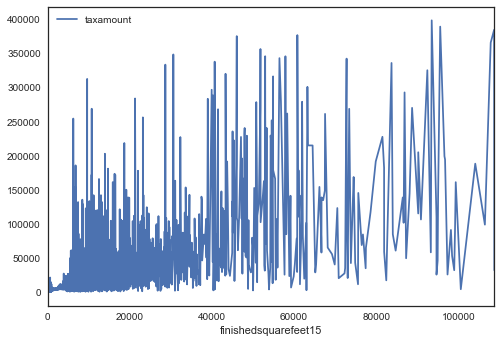

In [19]:
X = 'finishedsquarefeet15'
Y = 'taxamount'

df = house_df.loc[:,[X,Y]]
df.dropna(how='any', inplace=True)
df = df[df.finishedsquarefeet15 < 110000]
df = df[df.taxamount < 400000]
df = df.groupby(X).mean()
df.plot()

plt.show()

## 2.2 Scatter and Data Map 

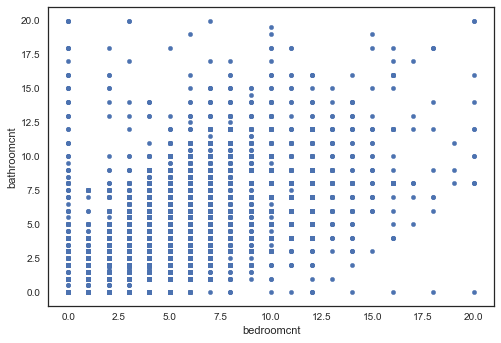

In [13]:
X = 'bedroomcnt'
Y = 'bathroomcnt'

df = house_df.loc[:,[X, Y]]
df.dropna(how='any', inplace=True)
df.plot(x=X, y=Y, kind='scatter')
plt.show()

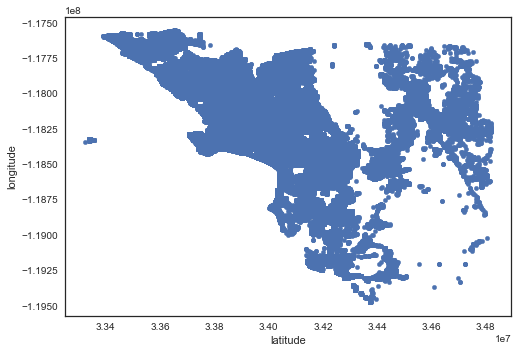

In [15]:
X = 'latitude'
Y = 'longitude'

df = house_df.loc[:,[X, Y]]
df.dropna(how='any', inplace=True)
df.plot(x=X, y=Y, kind='scatter')

plt.show()

## 2.3 Histogram and Bar

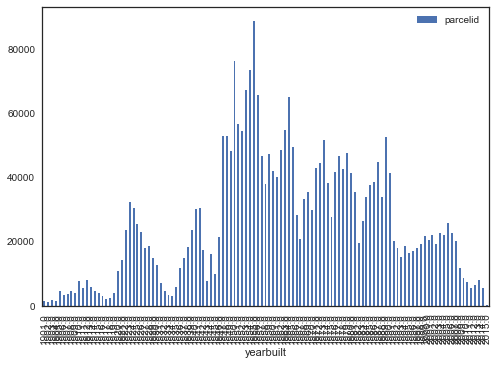

In [18]:
X = 'yearbuilt'
Y = 'parcelid'

df = house_df.loc[:,[X,Y]]
df.dropna(how='any', inplace=True)
df = df[df.yearbuilt>1900]
df = df.groupby(X).count()
df.plot(kind='bar')

plt.savefig('../figures/year_idcount.pdf')

plt.show()

---

# 3 Task Three: Linear Regression Baseline Model

## 3.1 Feature Selection

### 3.1.1 Missing Values

In linear regression models, we simply pick a subset of all features, and predict the objective logerror by assigning each feature a coefficient. First of all, we **simply drop features that have too many missing values**. The simple reason is that these features do not have enough data. We set a missing value threshold of 2,900,000.

In [27]:
nan = house_df.isnull().sum()
nan = nan[nan < 2900000]
nan_feature = nan.index.tolist()

house_nan_df = house_df.loc[:,nan_feature]

(58,)
(41,)


### 3.1.2 Categorical Features

After deleting the features with too many missing values, the number of features decreased from 58 to 41. The next step is to deal with catagorical features. A good way is **recode categorical predictors to a binary numeric system**. However, as a baseline model, it should aligns the **KISS** principle, so we decide to **simply ingore them and delete them**.

After we carefully studied every 41 features, we observed that there are 14 categorical features, as follows:

['parcelid','airconditioningtypeid','fips','heatingorsystemtypeid','pooltypeid7','propertycountylandusecode','propertylandusetypeid','propertyzoningdesc',
'rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood','regionidzip','censustractandblock']

We decide to **remove 13 of the 14 categorical features**. Parcelid is not being removed because *properties_2016.csv* and *train_2016_v2.csv* are joined together by a common *parcelid* column.

In [ ]:
cate_feature = ['airconditioningtypeid','fips','heatingorsystemtypeid','pooltypeid7','propertycountylandusecode','propertylandusetypeid',
                'propertyzoningdesc','rawcensustractandblock','regionidcity','regionidcounty','regionidneighborhood','regionidzip',
                'censustractandblock']

for i in cate_feature:
    nan_feature.remove(i)

nan_cate_feature = nan_feature

house_nan_cate_df = house_nan_df.loc[:,nan_cate_feature]

Then the features are down to 41 - 13 = 28 features.

### 3.1.3 Remove Highly Correlated Features

In the 28 features, there are some features that are highly correlated, sometimes they are even almost duplicated. Such kind of features do no good to our predition, so we decide to remove them and leave only one of the highly correlated features. After careful ovservation, the following are highly correlated features.

['calculatedfinishedsquarefeet', 'finishedsquarefeet12','finishedsquarefeet15', 'finishedsquarefeet50']

['taxamount','taxvaluedollarcnt']

We decide to remove 4 featuress: ['finishedsquarefeet12','finishedsquarefeet15', 'finishedsquarefeet50','taxvaluedollarcnt']

In [ ]:
highcorr_feature = ['finishedsquarefeet12','finishedsquarefeet15', 'finishedsquarefeet50','taxvaluedollarcnt']

for i in highcorr_feature:
    house_nan_cate_df.remove(i)

nan_cate_co_feature = house_nan_cate_df

house_nan_co_cate_df = house_nan_cate_df.loc[:,nan_cate_co_feature]
house_new_df = house_nan_co_cate_df

Finally, we get **24 features**. Then we are going to use these 24 features to do linear regression.

## 3.2 Impute Missing Value and Normalization

We need to make sure that there are no missing values in our final data. A simple imputation method is to **replaces** each missing value by the **mean** of the given column.In general, normally distributed values are the most comparable, so we also need to normalize the features. I tried **Z-Score** normalizing because this was what taught in class. 

However, I found out that feature 'poolcnt' can not be replaced by it's mean, because the scalar value of poolcnt is either '1' or NaN, as mentioned in section 1.3. So instead, I replaced it with '0', which means it doesn't have any pools. Actually this is it's real meanings.

In [ ]:
nan_zero = 'poolcnt'
house_new_df[nan_zero] = house_new_df[nan_zero].fillna(value=0)

nan_mean = ['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid','calculatedbathnbr', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'latitude', 'longitude',
       'lotsizesquarefeet', 'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount']

house_new_df[nan_mean] = house_new_df[nan_mean].fillna(house_new_df[nan_mean].mean())

In [ ]:
cols_to_norm = ['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedbathnbr', 'finishedfloor1squarefeet',
                'calculatedfinishedsquarefeet', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'latitude', 'longitude',
                'lotsizesquarefeet', 'poolcnt', 'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yearbuilt', 'numberofstories', 
                'structuretaxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount']

house_new_df[cols_to_norm] = house_new_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

## 3.3 Join Two Spreadsheets

In file 'properties_2016_backup.csv', there are many properties of houses. However, there is no **saling price**. This is because saling price is business secret, and can not let others know. The **target** of prediction is instead **logerror**, which is in anohter file named 'train_2016_v2.csv'. So we skip the saling price and directly predict logerror. Since the predicting target and the features of houses are in two different spreadsheets, we need to join two spreadsheets together.

In [ ]:
train_df = pd.read_csv('../data/train_2016_v2.csv')
join_df = train_df.merge(house_new_df, how='left', on='parcelid')

In [ ]:
join_df

## 3.4 Do the Linear Regression

### 3.4.1 Traning Data Set and Prediction Target

After all those wrangling with the data, finally we can do the linear regression! First, we need to separate the prediction target and the features. We need to make sure that the prediction target is logerror. For the feature part, do not forget to drop the *parcelid*. We do not want that during the regressions.

In [ ]:
target = join_df.loc[:,'logerror']
feature = join_df.iloc[:,2:]

Then suddenly we noticed that we need to do something with the datetime to a float, which is required in the regression model.

In [ ]:
def date_transform(df_test):
    for num,str in enumerate(df_test.transactiondate):
        date_time = datetime.datetime.strptime(str,'%Y-%m-%d')
        str = time.mktime(date_time.timetuple())
        df_test.set_value(num,'transactiondate',str)
    df_test['transactiondate'] = df_test['transactiondate'].astype(float) 
    test_matrix = df_test.as_matrix()
    return test_matrix

### 3.4.2 Train the Model

Training the model is as simple as two lines of python code. However, it do take some time to understand the mathematical beauty behind the code.

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(feature, target)

### 3.4.3 Do the Prediction

We are going to predict the same *parcelid* as in the original *properties_2016.csv* file, however, with a **different date time**. The date time are as follows: 2016/10, 2016/11, 2016/12, 2017/10, 2017/11, 2017/12. To do so, we first need to join the *feature* dataframe with it the *sample_submission.csv*, then add a new column named 'transactiondate', and fill it with the above six date time respectively. After the two dataframes are joined, we then drop the *parcelid* column.

In [ ]:
sample = pd.read_csv("../data/sample_submission.csv")

sample1 = sample.ParcelId
sample1 = sample1.to_frame()
df_test = sample1.merge(house_new_df, on='parcelid', how='left')

del df_test['parcelid']

Predict six times: 2016/10, 2016/11, 2016/12, 2017/10, 2017/11, 2017/12. To preict the logerror of the month, a simple way is to predict the midth day of each month.

In [ ]:
result = sample1.copy()
result.columns = ['ParcelId']


test1 = df_test.copy()
test1.insert(0,'transactiondate','2016-10-15')
test1 = date_transform(test1)
pred1 = model.predict(test1)
pred1 = np.asarray(pred1)
result.insert(1,'201610',pred1)


test2 = df_test.copy()
test2.insert(0,'transactiondate','2016-11-15')
test2 = date_transform(test2)
pred2 = model.predict(test2)
pred2 = np.asarray(pred2)
result.insert(2,'201611',pred2)


test3 = df_test.copy()
test3.insert(0,'transactiondate','2016-12-15')
test3 = date_transform(test3)
pred3 = model.predict(test3)
pred3 = np.asarray(pred3)
result.insert(3,'201612',pred3)


test4 = df_test.copy()
test4.insert(0,'transactiondate','2017-10-15')
test4 = date_transform(test4)
pred4 = model.predict(test4)
pred4 = np.asarray(pred4)
result.insert(4,'201710',pred4)


test5 = df_test.copy()
test5.insert(0,'transactiondate','2017-11-15')
test5 = date_transform(test5)
pred5 = model.predict(test5)
pred5 = np.asarray(pred5)
result.insert(5,'201711',pred5)


test6 = df_test.copy()
test6.insert(0,'transactiondate','2017-12-15')
test6 = date_transform(test6)
pred6 = model.predict(test6)
pred6 = np.asarray(pred6)
result.insert(6,'201712',pred6)


result.columns = ['ParcelId', '201610', '201611', '201612', '201710','201711','201712']
# change filename per run
result.to_csv('../predictions/sample4.csv',index=False,header=True)  

### 3.4.4 Test the Model

The way to test the model is to submit the results to Kaggle.com. It take around five minutes from the submission to final ranking results.

# 4 Task Four: Better Prediction Model

## 4.1 Ridge Regression

## 4.2 Random Forest Regression

# 5 Task Five: Predict All and Submit to Kaggle

# 6 Task Six: Report